#**Python para DS - Introducción al lenguaje**


# **Analisis de Estadisticas Descriptivas**

In [4]:
import pandas as pd
notas = pd.read_csv('/content/sample_data/ratings.csv')

In [5]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.shape

(100836, 4)

### "shape" me devuelve la estructura de mi conjunto de datos

In [7]:
notas.columns=["usuarioId", "peliculaId", "nota", "momento"]

In [8]:
notas.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
notas.head(10)

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [10]:
notas["nota"]

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


**.unique** devuelve valores unicos

In [11]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

**value_counts** contabiliza cuantas veces se repite cada valor


In [12]:
notas["nota"].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [13]:
notas["nota"].mean()
#devuelve el valor promedio

3.501556983616962

# **Visualización de los datos**

<Axes: >

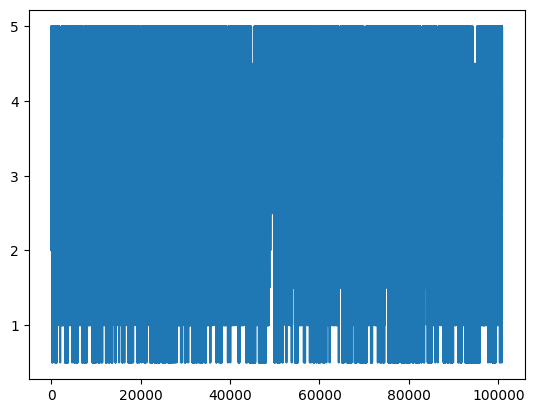

In [14]:
notas.nota.plot()

<Axes: ylabel='Frequency'>

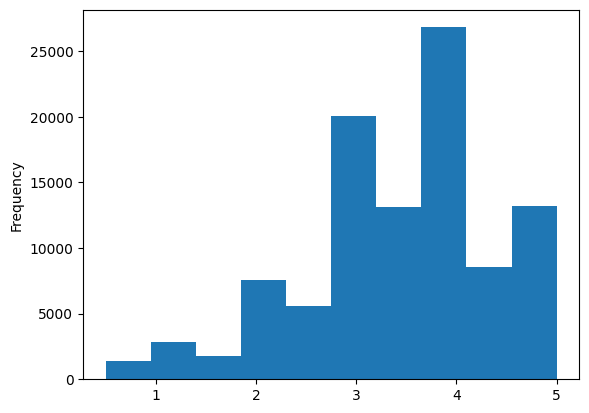

In [15]:
notas["nota"].plot(kind="hist")

In [16]:
print("promedio=", notas["nota"].mean())
print("mediana=", notas["nota"].median())

promedio= 3.501556983616962
mediana= 3.5


In [17]:
notas.nota.describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='nota'>

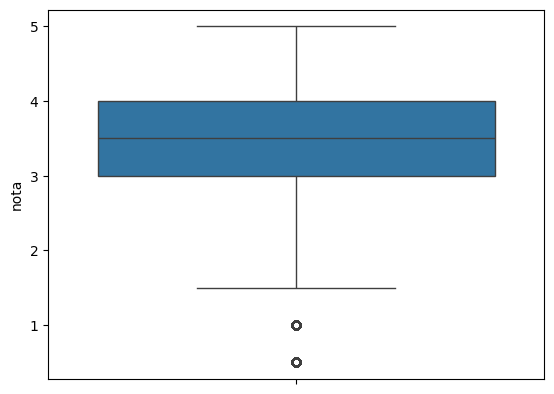

In [18]:
import seaborn as sns
sns.boxplot(notas.nota)

# **Analizando algunas notas especificas por película**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
peliculas = pd.read_csv('/content/sample_data/movies.csv')
print(notas.head(5))


   usuarioId  peliculaId  nota    momento
0          1           1   4.0  964982703
1          1           3   4.0  964981247
2          1           6   4.0  964982224
3          1          47   5.0  964983815
4          1          50   5.0  964982931


In [21]:
peliculas.columns=["peliculaId", "titulo", "genero"]
print(peliculas.head(5))

   peliculaId                              titulo  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   

                                        genero  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [23]:
notas.query('peliculaId==1')
#Devuelve todos los registros de notas que tienen como Id el número 1

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [24]:
notas.query('peliculaId==1').nota.mean()

3.9209302325581397

In [25]:
notas.query('peliculaId==1').nota.describe()


,nota
count,215.000000
mean,3.920930
std,0.834859
min,0.500000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


In [27]:
notas.groupby('peliculaId')

In [30]:
notas.groupby('peliculaId').mean().nota
# Se obtienen todos los promedios de cada una de las peliculas

,nota
peliculaId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [33]:
# cargamos el promedio de peliculas a una variable
promedios_por_peliculas = notas.groupby('peliculaId').mean().nota
promedios_por_peliculas.head()

,nota
peliculaId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

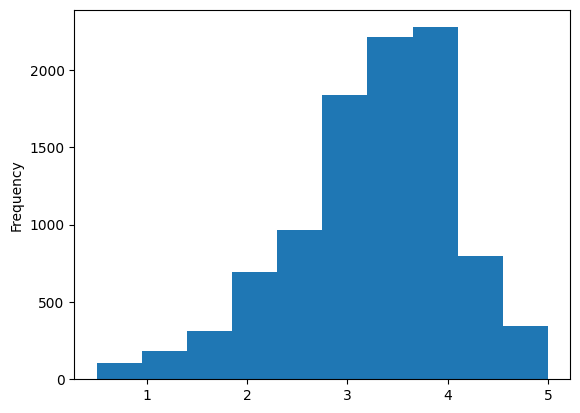

In [34]:
#Distribucion de promedios
promedios_por_peliculas.plot(kind="hist")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='nota'>

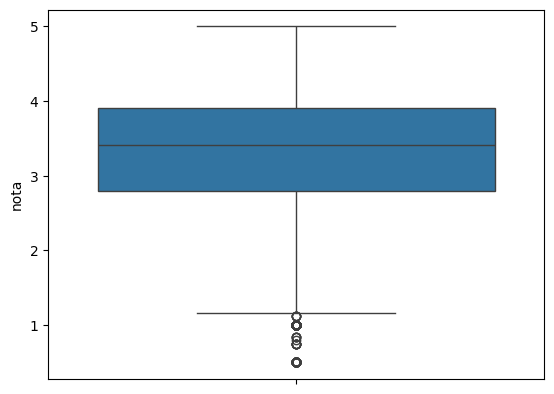

In [35]:
import seaborn as sns
sns.boxplot(promedios_por_peliculas)

In [36]:
promedios_por_peliculas.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


<ipython-input-37-a2f2a2ebe275>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(promedios_por_peliculas)


<Axes: xlabel='nota', ylabel='Density'>

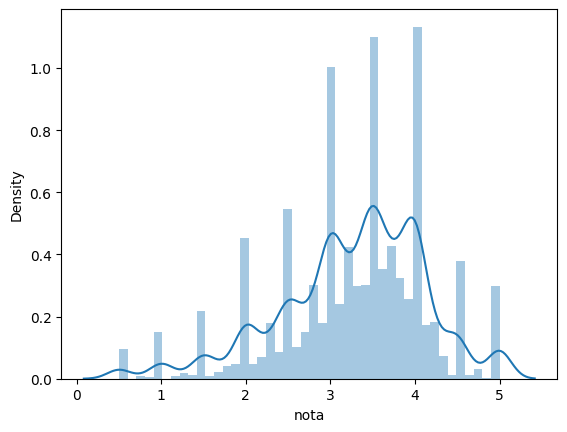

In [37]:
sns.distplot(promedios_por_peliculas)

<ipython-input-38-36b66014902b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(promedios_por_peliculas, bins =10)


<Axes: xlabel='nota', ylabel='Density'>

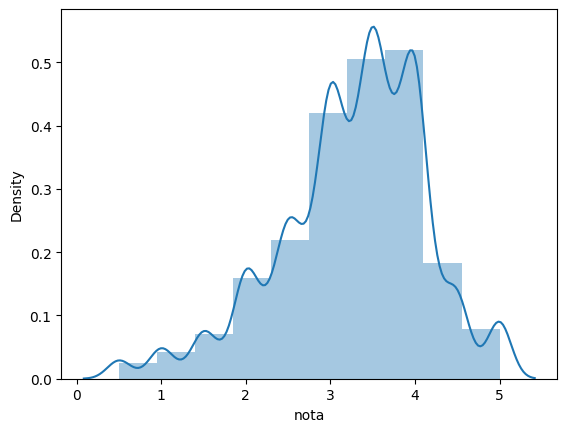

In [38]:
sns.distplot(promedios_por_peliculas, bins =10)
# con el parametro bins se genera el nuumero de intervalos deseados que para este caso es 10

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

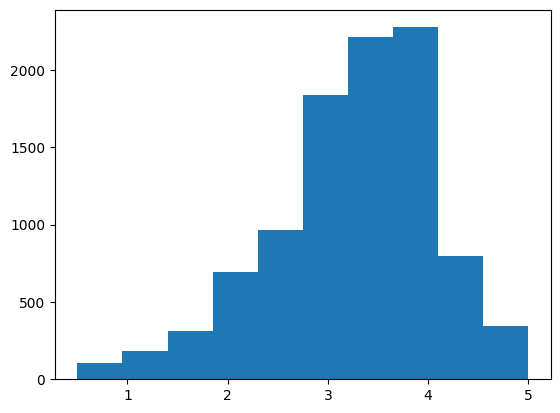

In [40]:
# matploltib
import matplotlib.pyplot as plt
plt.hist(promedios_por_peliculas, bins = 10)
# Es el mismo grafico de pandas pero con la libreria de matploltib

<function matplotlib.pyplot.show(close=None, block=None)>

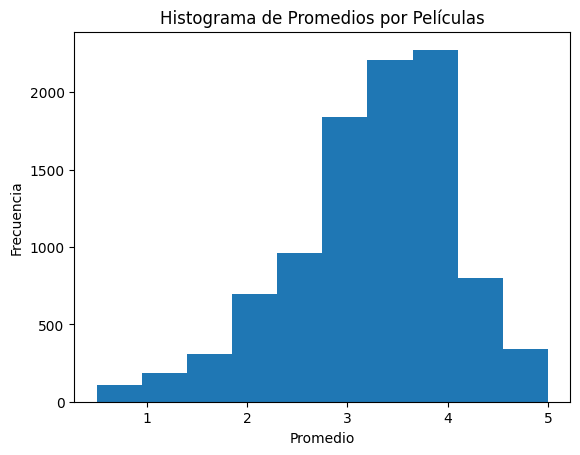

In [42]:
# Agregamos titulos al gráfico
plt.hist(promedios_por_peliculas)
plt.title('Histograma de Promedios por Películas')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='nota'>

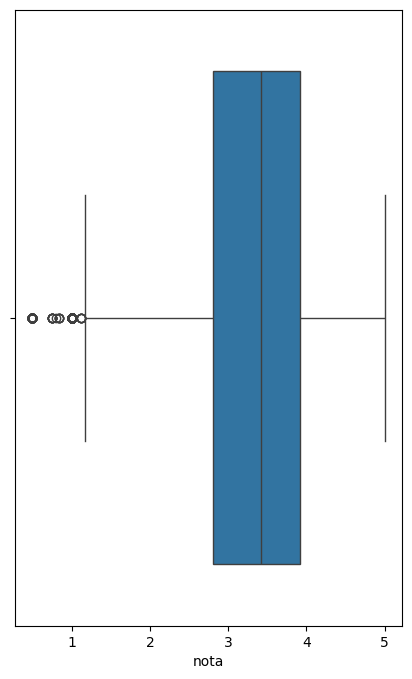

In [51]:
# Podemos definir el eje xo y para rotar el gráfico
plt.figure(figsize=(5,8)) # Define tamaño horizontal y vertical
sns.boxplot(x= promedios_por_peliculas)